<a href="https://colab.research.google.com/github/Rang09/Machine/blob/main/UTS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Dibawah ini di gunakan utnuk pemangilan data csv nya.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

from google.colab import files
uploader = files.upload()

Saving CADdataset.csv to CADdataset.csv


In [2]:
# dataset
disease_df = pd.read_csv("CADdataset.csv")
disease_df.drop(['Age'], inplace = True, axis = 1)
disease_df.rename(columns ={'Sex':'Sex_Fmale'}, inplace = True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.CAD.value_counts())

   Weight  Height Sex_Fmale        BMI  DM  HTN  Current Smoker Obesity DLP  \
0      90     175      Male  29.387755   0    1               1       Y   Y   
1      70     157     Fmale  28.398718   0    1               0       Y   N   
2      54     164      Male  20.077335   0    0               1       N   N   
3      67     158     Fmale  26.838648   0    1               0       Y   N   
4      87     153     Fmale  37.165193   0    1               0       Y   N   

    BP  ... LVH  PRP  FBS ESR  EF   RWMA EX-Smoker   CR  BUN     CAD  
0  110  ...   N    N   90   7  50      0         0  0.7    8     Cad  
1  140  ...   N    N   80  26  40      4         0  1.0   30     Cad  
2  100  ...   N    N   85  10  40      2         0  1.0   17     Cad  
3  100  ...   N    N   78  76  55      0         0  1.2   30  Normal  
4  110  ...   N    N  104  27  50      0         0  1.0   16  Normal  

[5 rows x 26 columns] (303, 26)
Cad       216
Normal     87
Name: CAD, dtype: int64


di bawah ini di gunakan untuk membuat diagram

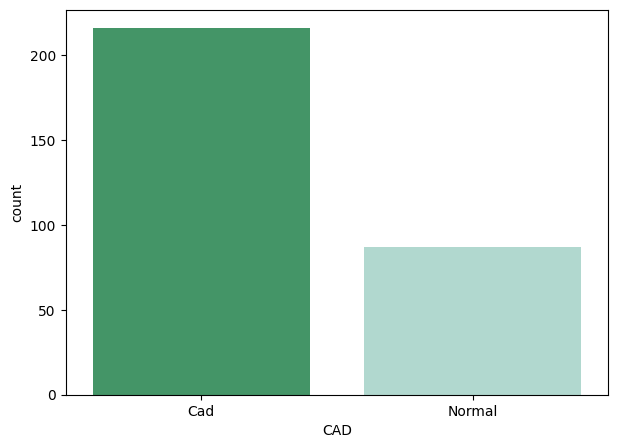

In [3]:
# conting no. of patiens affected with CAD
plt.figure(figsize=(7, 5))
sn.countplot(x='CAD', data=disease_df,
             palette="BuGn_r")
plt.show()

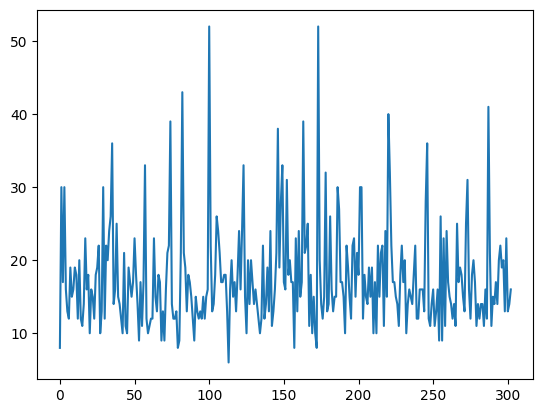

In [4]:
laste = disease_df['BUN'].plot()
plt.show(laste)

In [5]:
X = np.asarray(disease_df[['Weight', 'Height', 'BMI',
                          'FBS', 'ESR', 'EF']])
y = np.asarray(disease_df['EX-Smoker'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (212, 6) (212,)
Test set: (91, 6) (91,)


In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# Evaluation and accuracy
from sklearn.metrics import jaccard_score
print('')
print('Accuracy of the model in jaccard score is = ',
      jaccard_score (y_test, y_pred))


Accuracy of the model in jaccard score is =  0.0


In [7]:
# This code is contributed by @amartajisce
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)*100
print('Accurancy of the model is = ', score)

Accurancy of the model is =  94.5054945054945


In [ ]:
count_default = len(data[data['car_ID']==1])
count_no_default = len(data[data['car_ID']==0])
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default is:", pct_of_default*100)
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no-default is:", pct_of_no_default*100)

 percentage of default is: 100.0
 percentage of no-default is: 0.0


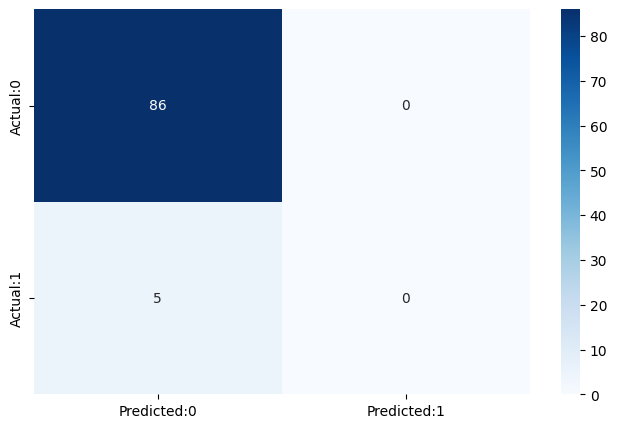

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        86
           1       0.00      0.00      0.00         5

    accuracy                           0.95        91
   macro avg       0.47      0.50      0.49        91
weighted avg       0.89      0.95      0.92        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                             columns = ['Predicted:0', 'Predicted:1'],
                             index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.show()
print('The details for confusion matrix is =')
print (classification_report (y_test, y_pred))